해설/정리 : https://road-slug-941.notion.site/NLP-f830fa0dd5144e208c6f8643667dcbee  
데이터셋 출처 : https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset

In [1]:
# upload the kaggle token
from google.colab import files
kaggle_token = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
# download kaggle datasets by kaggle API
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d zusmani/pakistans-largest-ecommerce-dataset
!unzip -q /content/pakistans-largest-ecommerce-dataset.zip

 36% 5.00M/13.8M [00:00<00:00, 34.8MB/s]
100% 13.8M/13.8M [00:00<00:00, 76.2MB/s]


In [3]:
# install libraries needed
!pip install datasets
!pip install category_encoders
!pip install transformers
# !pip install torchtext
# !pip install torchtext --upgrade
# !pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 452 kB 5.0 MB/s 
     |████████████████████████████████| 212 kB 69.7 MB/s 
     |████████████████████████████████| 182 kB 67.3 MB/s 
     |████████████████████████████████| 132 kB 69.5 MB/s 
     |████████████████████████████████| 127 kB 76.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 779 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 5.2 MB/s 
     |████████████████████████████████| 7.6 MB 53.0 MB/s 


In [4]:
# To EDA
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
# Data importing
df_origin = pd.read_csv('/content/Pakistan Largest Ecommerce Dataset.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_origin.shape

(1048575, 26)

In [6]:
# Drop NaN
df2 = df_origin.dropna(subset=['sku', 'category_name_1']) #결측값 드랍 (문제 형성의 필수조건이라 drop)

In [ ]:
df2.shape

(584340, 26)

In [7]:
# It is too big to progress in colab
from sklearn.model_selection import train_test_split
df2, df = train_test_split(df2,
                              test_size=0.005,
                              stratify=df2['category_name_1'],
                              random_state=42)
df.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

In [8]:
df2.shape

(581418, 26)

In [9]:
df.shape

(2922, 26)

In [10]:
df = df[['sku', 'price', 'category_name_1']] # hackon-like shape
df.rename(columns={'category_name_1':'label'}, inplace=True)

df2 = df2[['sku', 'price', 'category_name_1']] # hackon-like shape
df2.rename(columns={'category_name_1':'label'}, inplace=True)

df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,sku,price,label
0,WOFGUL59AD7B7EC4862,3569.0,Women's Fashion
1,bata_wein-8837152-42-8,2199.0,Men's Fashion
2,APPTHU59F6F07255F50,499.0,Appliances
3,HASQAR5A5369034ECAE,195.0,Health & Sports
4,iGeek_Selfie Stick Universal for All Mobile Ph...,291.0,Mobiles & Tablets


In [ ]:
# distriution of Target
df['label'].nunique(), df['label'].unique()

(16, array(["Women's Fashion", 'Computing', 'Mobiles & Tablets',
        'Beauty & Grooming', 'Superstore', "Men's Fashion", '\\N',
        'Home & Living', 'Others', 'Soghaat', 'Kids & Baby', 'Appliances',
        'Entertainment', 'Health & Sports', 'School & Education', 'Books'],
       dtype=object))

[]

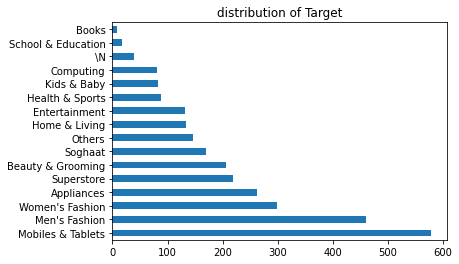

In [11]:
# Visualize the Target
df['label'].value_counts().plot.barh()
plt.title('distribution of Target')
plt.plot()

[]

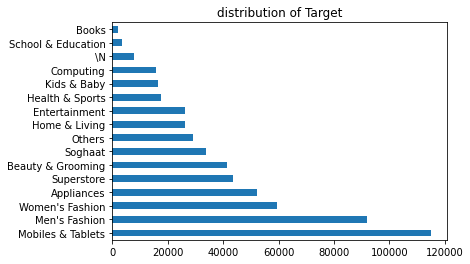

In [12]:
df2['label'].value_counts().plot.barh()
plt.title('distribution of Target')
plt.plot()

In [ ]:
# check the null
df.isnull().sum()

sku      0
price    0
label    0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


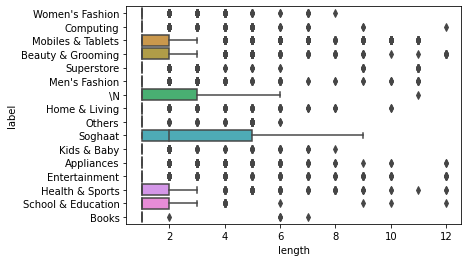

In [ ]:
# visualize the length by target
df['length'] = df['sku'].str.split().apply(len)
sns.boxplot('length',
            'label',
            data=df
            )
plt.show()

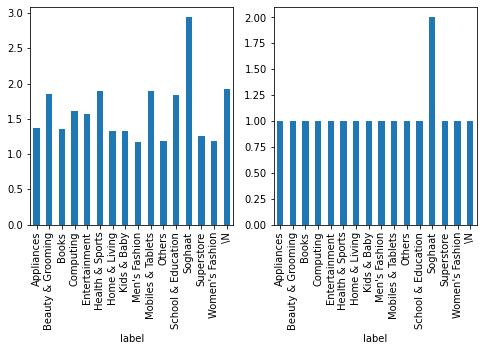

In [ ]:
# mean, median of length
f, ax = plt.subplots(1, 2, figsize=(8, 4))
df.groupby('label')['length'].mean().plot.bar(ax=ax[0])
df.groupby('label')['length'].median().plot.bar(ax=ax[1])
plt.show()

In [ ]:
## prepare the datasets
df.drop(columns=['length'], inplace=True)

In [13]:
# train_test_split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,
                              test_size=0.15,
                              stratify=df['label'],
                              random_state=42)

In [ ]:
train['label'].nunique(), test['label'].nunique()

(16, 16)

In [14]:
from category_encoders import OrdinalEncoder
ord_enc = OrdinalEncoder(cols=['label'])

test_df = ord_enc.fit_transform(df2)
train = ord_enc.transform(train)
test = ord_enc.transform(test)

In [ ]:
test

,sku,price,label
17423,Apple iPhone 6 (64GB) Silver,84375.0,1
14760,SEH59F8263CD44C1,2599.0,8
8403,LS_5060337500524,175.0,8
8921,BAGKEM5AB0ADF40A65C,490.0,7
18954,WOFJUN59BAF8A1AEA1E,1791.0,10
...,...,...,...
12840,head_287006-NV,1290.0,5
22145,HALSHO59F82EA23FB6F,239.0,11
10014,cr_MUZAFTI IRANI (500GM),185.0,2
17506,APPPHI59FADAE20C078,3199.0,4


[]

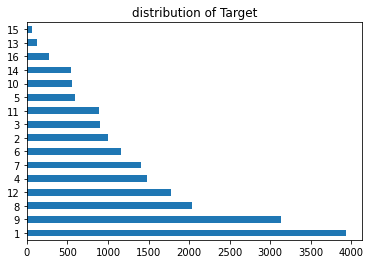

In [ ]:
train['label'].value_counts().plot.barh()
plt.title('distribution of Target')
plt.plot()

[]

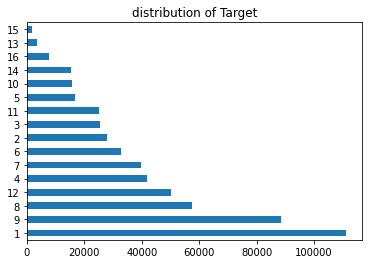

In [ ]:
test_df['label'].value_counts().plot.barh()
plt.title('distribution of Target')
plt.plot()

In [15]:
# convert pd.DataFrame to datasetDict
import datasets

train_dataset = datasets.Dataset.from_dict(train)
test_dataset = datasets.Dataset.from_dict(test)
test_df_dataset = datasets.Dataset.from_dict(test_df)
df_dataset = datasets.DatasetDict({"train":train_dataset,"test":test_dataset})
test_df_dataset = datasets.DatasetDict({"test":test_df_dataset})

In [ ]:
df_dataset

DatasetDict({
    train: Dataset({
        features: ['sku', 'price', 'label'],
        num_rows: 17000
    })
    test: Dataset({
        features: ['sku', 'price', 'label'],
        num_rows: 3000
    })
})

In [ ]:
test_df_dataset

DatasetDict({
    test: Dataset({
        features: ['sku', 'price', 'label'],
        num_rows: 560966
    })
})

In [ ]:
df_dataset['train']['sku'][514]

'GG_RTW004-Large'

In [16]:
# for modeling
import torch
import torch.nn as nn

In [17]:
# pretrained model import
from transformers import AutoModel

# declare the name of pretrained model
model_ckpt = 'distilbert-base-uncased'

# (automatically) import tokenizer of pretrained model
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [18]:
# func definition for tokenizing
def tokenize(batch):
	return tokenizer(batch['sku'], padding=True, truncation=True)

In [ ]:
## tokenizing

# sample
print(tokenize(df_dataset['train'][1:2]))

{'input_ids': [[101, 10208, 1035, 14163, 24458, 3490, 8865, 4213, 1011, 17528, 21693, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
input_text = df_dataset['train']['sku'][1]
token_text = tokenizer.tokenize(input_text)
print(input_text)
print(token_text)

Ahmed_MultaniHalwa-275gm
['ahmed', '_', 'mu', '##lta', '##ni', '##hal', '##wa', '-', '275', '##gm']


In [19]:
# tokenizing all
dataset_enc = df_dataset.map(tokenize, batched=True, batch_size=None)
dataset_enc2 = test_df_dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
# check the result
print(dataset_enc['train'].column_names)
print(dataset_enc2['test'].column_names)

['sku', 'price', 'label', 'input_ids', 'attention_mask']
['sku', 'price', 'label', 'input_ids', 'attention_mask']


In [ ]:
dataset_enc

DatasetDict({
    train: Dataset({
        features: ['sku', 'price', 'label', 'input_ids', 'attention_mask'],
        num_rows: 19867
    })
    test: Dataset({
        features: ['sku', 'price', 'label', 'input_ids', 'attention_mask'],
        num_rows: 3507
    })
})

In [ ]:
## modeling processest
print(tokenizer(dataset_enc['train']['sku'][1]))
print(dataset_enc['train']['sku'][1])

{'input_ids': [101, 10208, 1035, 14163, 24458, 3490, 8865, 4213, 1011, 17528, 21693, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
Ahmed_MultaniHalwa-275gm


In [ ]:
# dataset_enc = dataset_enc.remove_columns(['sku'])

In [ ]:
dataset_enc

DatasetDict({
    train: Dataset({
        features: ['sku', 'price', 'label', 'input_ids', 'attention_mask'],
        num_rows: 17000
    })
    test: Dataset({
        features: ['sku', 'price', 'label', 'input_ids', 'attention_mask'],
        num_rows: 3000
    })
})

In [20]:
# func def for hidden_states
def extract_hidden_states(batch):
	inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
	with torch.no_grad():
		last_hidden_state = model(**inputs).last_hidden_state

	return {'hidden_state': last_hidden_state[:, 0].cpu().numpy()}

In [21]:
# set the model and device
device = torch.device('cuda' if torch.cuda.is_available() else'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)  

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [22]:
# converting the dataset to Tensor for using dataset to inputs
dataset_enc.set_format('torch', columns=['label', 'price', 'input_ids', 'attention_mask'])
dataset_enc2.set_format('torch', columns=['label', 'price', 'input_ids', 'attention_mask'])

In [23]:
# get hidden states
dataset_hidden = dataset_enc.map(extract_hidden_states, batched=True)
#dataset_hidden2 = dataset_enc2.map(extract_hidden_states, batched=True) # 은닉층은 예측값을 위해서는 필요없다

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
dataset_hidden['train'].column_names

['sku', 'price', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [24]:
X_train = np.array(dataset_hidden['train']['hidden_state'])
X_test = np.array(dataset_hidden['test']['hidden_state'])
#X_test_df = np.array(dataset_hidden2['test']['hidden_state'])

y_train = np.array(dataset_hidden['train']['label'])
y_test = np.array(dataset_hidden['test']['label'])
#y_test_df = np.array(dataset_hidden2['test']['label'])

In [25]:
# X(hidden state), y(labels) are numberical data either so I try LogisticRegression model
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=300)
lr_clf.fit(X_train, y_train)
print("테스트 결과 : ", lr_clf.score(X_test, y_test))
#print("전체 데이터셋 테스트 결과 : ", lr_clf.score(X_test_df, y_test_df))

테스트 결과 :  0.8291571753986332


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
#almost randomized model
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
print("테스트 결과 : ", dummy_clf.score(X_test, y_test))
#print("전체 데이터셋 테스트 결과 : ", dummy_clf.score(X_test_df, y_test_df))

테스트 결과 :  0.19817767653758542


In [ ]:
## hyperparameters tunning

In [27]:
# pretrained model import for setting the Trainer
from transformers import AutoModelForSequenceClassification

num_labels = 17
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))
## It was supposed to be 16, but there was an error when it was 16. So I put 17, it works. I don't know why.

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'pre_classi

In [28]:
# setting the score for setting the Trainer

from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
	labels = pred.label_ids
	preds = pred.predictions.argmax(-1)
	f1 = f1_score(labels, preds, average='weighted')
	acc = accuracy_score(labels, preds)
	return {'accuracy':acc, 'f1':f1}

In [ ]:
## Train

In [31]:
# TrainingArguments definition for Trainer
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(dataset_enc['train']) // batch_size
model_name = f'{model_ckpt}-finetuned-emotion'
training_args = TrainingArguments(output_dir=model_name,
																	num_train_epochs=10,
																	learning_rate=2e-5,
																	per_device_train_batch_size=batch_size,
																	per_device_eval_batch_size=batch_size,
																	weight_decay=0.01,
																	evaluation_strategy='epoch',
																	disable_tqdm=False,
																	logging_steps=logging_steps,
																	push_to_hub=False,
																	save_strategy='epoch',
																	load_best_model_at_end=True,
																	log_level='error')

In [36]:
# Trainer setting, train
from transformers import Trainer
from transformers import DataCollatorForTokenClassification

trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=compute_metrics,
									train_dataset=dataset_enc['train'],
									eval_dataset=dataset_enc['test'],
									tokenizer=tokenizer
                  )

trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.059500,0.414342,0.917995,0.915924
2,0.042000,0.430811,0.915718,0.913284
3,0.033000,0.514856,0.899772,0.897340
4,0.027400,0.449105,0.915718,0.914271
5,0.028500,0.498959,0.906606,0.904666
6,0.019200,0.469719,0.911162,0.909674
7,0.018300,0.449608,0.911162,0.909307
8,0.013300,0.462529,0.911162,0.909605
9,0.015300,0.464791,0.915718,0.913956
10,0.010700,0.463598,0.913440,0.911764


TrainOutput(global_step=390, training_loss=0.02631972598341795, metrics={'train_runtime': 103.4456, 'train_samples_per_second': 240.029, 'train_steps_per_second': 3.77, 'total_flos': 186350226181860.0, 'train_loss': 0.02631972598341795, 'epoch': 10.0})

In [34]:
print(compute_metrics(trainer.predict(dataset_enc['test'])))

{'accuracy': 0.9134396355353075, 'f1': 0.9102998482747208}


In [35]:
print(compute_metrics(trainer.predict(dataset_enc2['test'])))

{'accuracy': 0.8969674141495447, 'f1': 0.895473494861427}
